# Time-Series Prediction

## Imports

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)

# Import the plotting library
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

from keras.layers import GRU, Embedding, LSTM

from keras.models import load_model
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [4]:
!pip install yfinance
import yfinance as yf

In [6]:
!pip install pandas_datareader
from pandas_datareader import data as wb

In [ ]:
#dir(yf)

### Download Stock Market Data using Yahoo Finance

[*********************100%***********************]  1 of 1 completed


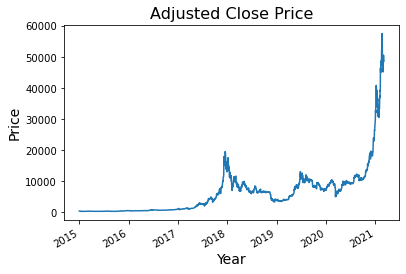

In [7]:
# Get the data of the stock AAPL
aapl = yf.download('BTC-USD','2015-01-01','2021-03-05')
# Plot the close price of the AAPL
aapl['Adj Close'].plot()
plt.title("Adjusted Close Price", fontsize=16)
# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.show()

In [8]:
aapl.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,310.914001,320.192993,310.210999,320.192993,320.192993,13942900
2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550
2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650
2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400
2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100


In [9]:
aapl.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2252.000000,2252.000000,2252.000000,2252.000000,2252.000000,2.252000e+03
mean,6121.123983,6296.489630,5942.238791,6141.307295,6141.307295,1.129328e+10
std,7630.370746,7921.933684,7329.692379,7677.800297,7677.800297,1.778385e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,7.860650e+06
25%,597.401993,603.536255,588.851746,597.946228,597.946228,7.729832e+07
50%,4354.195068,4430.155029,4217.530029,4368.375000,4368.375000,4.056775e+09
75%,8903.514160,9147.256104,8706.850586,8899.835205,8899.835205,1.749716e+10
max,57532.738281,58330.570312,55672.609375,57539.945312,57539.945312,3.509679e+11


In [10]:
aapl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2252 entries, 2014-12-31 to 2021-03-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2252 non-null   float64
 1   High       2252 non-null   float64
 2   Low        2252 non-null   float64
 3   Close      2252 non-null   float64
 4   Adj Close  2252 non-null   float64
 5   Volume     2252 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 123.2 KB


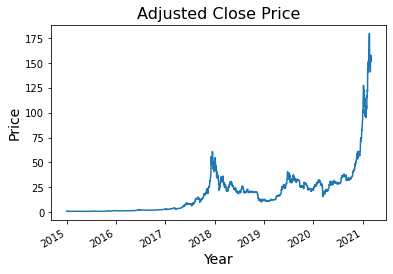

In [11]:
aapl_daily_returns = (aapl['Adj Close'].pct_change()+1).cumprod()
aapl_daily_returns.plot()
plt.title("Adjusted Close Price", fontsize=16)
# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.show()
#aapl_monthly_returns = aapl['Adj Close'].resample('M').ffill().pct_change()

In [12]:
aapl_daily_returns

Date
2014-12-31           NaN
2015-01-01      0.981436
2015-01-02      0.983882
2015-01-03      0.877852
2015-01-04      0.825112
                 ...    
2021-02-28    140.970510
2021-03-01    155.004148
2021-03-02    151.093214
2021-03-03    157.836815
2021-03-04    151.662182
Name: Adj Close, Length: 2252, dtype: float64

A nice tutorial on financial data analysis: https://www.codingfinance.com/post/2018-04-03-calc-returns-py/

### Calculating the daily and monthly returns for individual stock:

Once we downloaded the stock prices from yahoo finance, the next thing to do is to calculate the returns. We will again use pandas package to do the calculations. We have already downloaded the price data for AAPL above, if you haven’t done that then see the above section. We will calculate the monthly and daily price returns.
```python
aapl_daily_returns = aapl['Adj Close'].pct_change()
aapl_monthly_returns = aapl['Adj Close'].resample('M').ffill().pct_change()
```

### Calculating the cumulative returns for individual stock:

Plotting the daily and monthly returns are useful for understanding the daily and monthly volatility of the investment. To calculate the growth of our investment or, in other words, calculating the total returns from our investment, we need to calculate the cumulative returns from that investment. To calculate the cumulative returns we will use the cumprod() function.
```python
aapl_cum_returns = (aapl_daily_returns + 1).cumprod()
```

#### Plot the data:
```python
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(aapl_cum_returns)
ax1.set_xlabel("Date")
ax1.set_ylabel("Percent")
ax1.set_title("AAPL daily returns data")
plt.show()
```

### Download Several Stocks

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


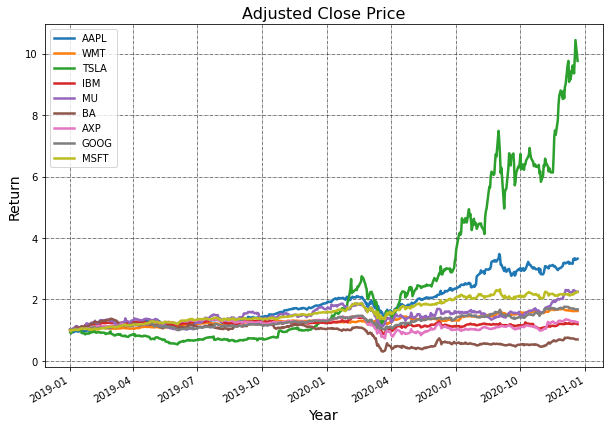

In [13]:
# Define the ticker list
tickers_list = ['AAPL', 'WMT','TSLA', 'IBM', 'MU', 'BA', 'AXP','GOOG','MSFT']

stock_data = pd.DataFrame(columns=tickers_list)
# Fetch the data

for ticker in tickers_list:
    stock_data[ticker] = yf.download(ticker, '2019-1-1', '2020-12-22')['Adj Close']
# Print first 5 rows of the data
#stock_data.head()


# Plot all the close prices
# the cumulative returns for individual stocks
((stock_data.pct_change()+1).cumprod()).plot(figsize=(10, 7), linewidth=2.5)
# Show the legend
plt.legend()
# Define the label for the title of the figure
plt.title("Adjusted Close Price", fontsize=16)
# Define the labels for x-axis and y-axis
plt.ylabel('Return', fontsize=14)
plt.xlabel('Year', fontsize=14)
# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

#plt.savefig('foo.png', transparent=True)

In [14]:
stock_data.head()

,AAPL,WMT,TSLA,IBM,MU,BA,AXP,GOOG,MSFT
Date,,,,,,,,,
2018-12-31,38.282608,88.752037,66.559998,93.810295,31.685709,313.372223,91.231194,1035.609985,98.217590
2019-01-02,38.326298,88.933044,62.023998,95.081223,32.704285,314.645142,91.575745,1045.849976,97.782425
2019-01-03,34.508701,88.475723,60.071999,93.183075,30.956728,302.100555,89.788254,1016.059998,94.185211
2019-01-04,35.981865,89.028328,63.537998,96.822594,32.654354,317.822571,93.834152,1070.709961,98.565697
2019-01-07,35.901775,90.076401,66.991997,97.507584,33.952541,318.823425,94.343483,1068.390015,98.691399


### Download Stock Market Data using Pandas DataReader

In [15]:
#import datetime as dt

start = '2019-6-20'
end = '2019-7-20'

tickers = ['CSCO','AXP','HD','PG']

thelen = len(tickers)

price_data = []
for ticker in tickers:
    prices = wb.DataReader(ticker, start = start, end = end, data_source='yahoo')[['Adj Close']]
    price_data.append(prices.assign(ticker=ticker)[['ticker', 'Adj Close']])

stock_df = pd.concat(price_data)
#stock_df.dtypes
#stock_df.head()
#stock_df.shape


In [16]:
stock_df

,ticker,Adj Close
Date,,
2019-06-20,CSCO,53.180481
2019-06-21,CSCO,52.828484
2019-06-24,CSCO,52.967434
2019-06-25,CSCO,51.948475
2019-06-26,CSCO,52.430157
...,...,...
2019-07-15,PG,108.530968
2019-07-16,PG,108.916283
2019-07-17,PG,108.963280


In [17]:
# Create a pivot table to summarise data
stock_df = stock_df.reset_index()
stock_df = stock_df.set_index('Date')
table = stock_df.pivot(columns='ticker')
# By specifying col[1] in below list comprehension
# You can select the stock names under multi-level column
table.columns = [col[1] for col in table.columns]
table.head()

,AXP,CSCO,HD,PG
Date,,,,
2019-06-20,120.475792,53.180481,199.653671,105.016014
2019-06-21,120.292564,52.828484,197.895798,104.508507
2019-06-24,119.723549,52.967434,194.219330,105.570511
2019-06-25,118.778419,51.948475,193.501053,104.997223
2019-06-26,119.193123,52.430157,195.088806,103.126968


In [18]:
table.shape

(21, 4)

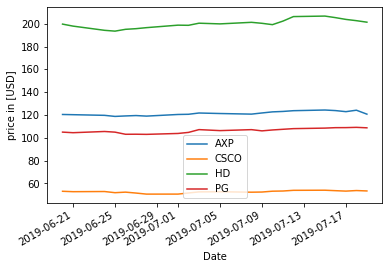

In [19]:
for column in table.columns:
    f = table[column] 
    #f = ((f.pct_change()+1).cumprod())
    f.plot(label=column);
    plt.legend()
    plt.ylabel('price in [USD]')

plt.show()

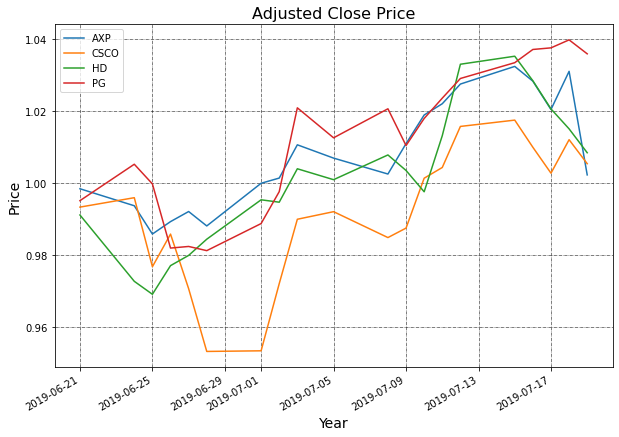

In [20]:
# Plot all the close prices
# the cumulative returns for individual stocks
((table.pct_change()+1).cumprod()).plot(figsize=(10, 7))
# Show the legend
plt.legend()
# Define the label for the title of the figure
plt.title("Adjusted Close Price", fontsize=16)
# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)
# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

### Split the Data into Train/test subsets .. ONLY use IBM

In [21]:
stock_data.shape

(499, 9)

<AxesSubplot:xlabel='Date'>

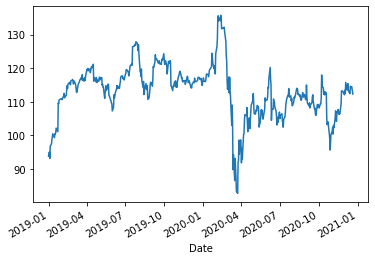

In [22]:
data = stock_data['IBM']
data.plot()

In [23]:
train_df = data[:400]#aapl['Adj Close'][:250]#df['Water Level (m)'][0:100]
print('train shape:', train_df.shape)
test_df = data[400:]#aapl['Adj Close'][250:]#df['Water Level (m)'][100:]
print('test shape: ',test_df.shape)

print("Min x:", np.min(train_df))
print("Max x:", np.max(train_df))

train shape: (400,)
test shape:  (99,)
Min x: 82.81954193115234
Max x: 135.72547912597656


### Normalise the Data into values between 0 and 1

In [24]:
## After this step train and test will become numpy matrices instead of pandas dataframes
## NOTICE: we use the model that is fitted to the train data to scale the test data .. 
## very important to do it this way!

x_scaler = MinMaxScaler()
train = x_scaler.fit_transform(train_df.values.reshape(-1, 1))
test = x_scaler.transform(test_df.values.reshape(-1, 1))

In [25]:
# make sure values are between 0-1
print("Min x:", np.min(train))
print("Max x:", np.max(train))

Min x: 0.0
Max x: 1.0


### To Split Data into Sequences


In [26]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = [], []
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

#### Create sequences for training data

In [27]:
seq = [1,2,3,4,5,6,7,8,9,10]
steps = 3
split_sequence(seq,steps)

(array([[1, 2, 3],
        [2, 3, 4],
        [3, 4, 5],
        [4, 5, 6],
        [5, 6, 7],
        [6, 7, 8],
        [7, 8, 9]]),
 array([ 4,  5,  6,  7,  8,  9, 10]))

In [28]:
# define input sequence
# choose a number of time steps
n_steps = 5
# split into samples
X_train, y_train = split_sequence(train, n_steps)

In [29]:
X_train

array([[[0.20774139],
        [0.23176379],
        [0.19588601],
        [0.26467827],
        [0.27762558]],

       [[0.23176379],
        [0.19588601],
        [0.26467827],
        [0.27762558],
        [0.30383185]],

       [[0.19588601],
        [0.26467827],
        [0.27762558],
        [0.30383185],
        [0.31724726]],

       ...,

       [[0.58846415],
        [0.56603307],
        [0.54025424],
        [0.54728475],
        [0.51815801]],

       [[0.56603307],
        [0.54025424],
        [0.54728475],
        [0.51815801],
        [0.53238661]],

       [[0.54025424],
        [0.54728475],
        [0.51815801],
        [0.53238661],
        [0.49187676]]])

#### Create sequences for test data

In [30]:
# define test sequence
# choose a number of time steps .. same as training!
#n_steps = 5
# split into samples
X_test, y_test = split_sequence(test, n_steps)
#X_test.shape

#### Data Shape suitable for feeding into TF/Keras

In [31]:
print(X_train.shape)
print(X_test.shape)

(395, 5, 1)
(94, 5, 1)


## Model Building and Fitting (RNN, LSTM and GRU)

In [32]:
n_features = 1

# define model
model = Sequential()

# Single layer GRU
#model.add(GRU(32 , input_shape=(n_steps, n_features) ))

# Stacked GRU
#model.add(GRU(8 , input_shape=(n_steps, n_features) , return_sequences=True))
#model.add(GRU(16, return_sequences=True))
#model.add(GRU(32))

# Stacked LSTM
model.add(LSTM(8, activation='relu', input_shape=(n_steps, n_features), return_sequences=True))
model.add(LSTM(16, activation='relu', return_sequences=True))
model.add(LSTM(32, activation='relu'))

model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=1, callbacks=[es, mc])

# fit model
#model.fit(X_train, y_train, epochs=50, verbose=1, callbacks=[es, mc])

Epoch 1/100
10/10 [==============================] - 3s 61ms/step - loss: 0.4041 - val_loss: 0.2202

Epoch 00001: val_loss improved from inf to 0.22024, saving model to best_model.h5
Epoch 2/100
10/10 [==============================] - 0s 8ms/step - loss: 0.3827 - val_loss: 0.2051

Epoch 00002: val_loss improved from 0.22024 to 0.20507, saving model to best_model.h5
Epoch 3/100
10/10 [==============================] - 0s 7ms/step - loss: 0.3616 - val_loss: 0.1882

Epoch 00003: val_loss improved from 0.20507 to 0.18823, saving model to best_model.h5
Epoch 4/100
10/10 [==============================] - 0s 8ms/step - loss: 0.3377 - val_loss: 0.1690

Epoch 00004: val_loss improved from 0.18823 to 0.16895, saving model to best_model.h5
Epoch 5/100
10/10 [==============================] - 0s 8ms/step - loss: 0.3085 - val_loss: 0.1456

Epoch 00005: val_loss improved from 0.16895 to 0.14556, saving model to best_model.h5
Epoch 6/100
10/10 [==============================] - 0s 8ms/step - loss: 

10/10 [==============================] - 0s 7ms/step - loss: 0.0056 - val_loss: 0.0042

Epoch 00051: val_loss did not improve from 0.00402
Epoch 52/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0057 - val_loss: 0.0045

Epoch 00052: val_loss did not improve from 0.00402
Epoch 00052: early stopping


In [33]:
history.history

{'loss': [0.4041391611099243,
  0.38271647691726685,
  0.3615809679031372,
  0.3376983106136322,
  0.30847856402397156,
  0.2711797058582306,
  0.21981072425842285,
  0.14696753025054932,
  0.052619799971580505,
  0.01775423437356949,
  0.012715446762740612,
  0.012818187475204468,
  0.010923311114311218,
  0.010336126200854778,
  0.009847426787018776,
  0.009295186959207058,
  0.008782587945461273,
  0.008210419677197933,
  0.0077702971175313,
  0.0073507558554410934,
  0.0070064556784927845,
  0.006893863435834646,
  0.006660915445536375,
  0.006640913896262646,
  0.0065609971061348915,
  0.0064924489706754684,
  0.00638321228325367,
  0.0064300126396119595,
  0.0064672320149838924,
  0.006450028158724308,
  0.006443904247134924,
  0.006334609817713499,
  0.006319587118923664,
  0.0062399497255682945,
  0.0062339515425264835,
  0.006165644619613886,
  0.00606066407635808,
  0.00636768713593483,
  0.006417140364646912,
  0.006353170145303011,
  0.006087882909923792,
  0.00589967658743

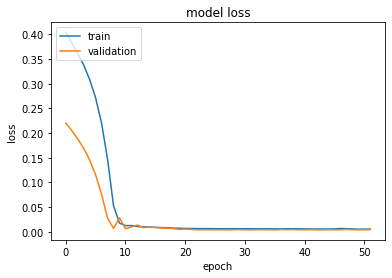

In [34]:
## visualise performance (training loss vs validation loss)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Model Building and Fitting CNN

In [35]:
n_features = 1
# define model
model = Sequential()
#model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
#model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X_train, y_train, epochs=20, verbose=1)


Epoch 1/20
13/13 [==============================] - 0s 871us/step - loss: 0.1771
Epoch 2/20
13/13 [==============================] - 0s 999us/step - loss: 0.0211
Epoch 3/20
13/13 [==============================] - 0s 1ms/step - loss: 0.0053
Epoch 4/20
13/13 [==============================] - 0s 1ms/step - loss: 0.0046
Epoch 5/20
13/13 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 6/20
13/13 [==============================] - 0s 999us/step - loss: 0.0033
Epoch 7/20
13/13 [==============================] - 0s 1ms/step - loss: 0.0032
Epoch 8/20
13/13 [==============================] - 0s 1ms/step - loss: 0.0031
Epoch 9/20
13/13 [==============================] - 0s 999us/step - loss: 0.0030
Epoch 10/20
13/13 [==============================] - 0s 1ms/step - loss: 0.0028
Epoch 11/20
13/13 [==============================] - 0s 1ms/step - loss: 0.0027
Epoch 12/20
13/13 [==============================] - 0s 1ms/step - loss: 0.0026
Epoch 13/20
13/13 [======================

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 4, 64)             192       
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                12850     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 13,093
Trainable params: 13,093
Non-trainable params: 0
_________________________________________________________________


### Load the saved model

In [37]:
from keras.models import load_model

# load the saved model
model = load_model('best_model.h5')

#### Compute RMSE for Evaluation

In [38]:
def rmse(y_true, y_pred):
        return np.sqrt(np.mean(np.square(y_pred - y_true))) 

In [39]:
preds = []
# demonstrate predictions
for i in range(X_test.shape[0]):
    x_input = X_test[i]
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    preds.append(yhat[0])
    #print(yhat[0], y_test[i])

In [40]:
#preds

### After getting the predictions we need to transform the predicted and actual Y values into their original range
### Remember we applied scaling previously

In [41]:
# The output of the model is between 0 and 1.
# Do an inverse map to get it back to the scale
# of the original data-set.
preds   = x_scaler.inverse_transform(np.array(preds))
# we also rescale the y_test values into their original range (inverse scaling)
actuals = x_scaler.inverse_transform(y_test)

In [42]:
rmse(actuals, preds)

3.0180347147502706

#### Plot True vs Predicted

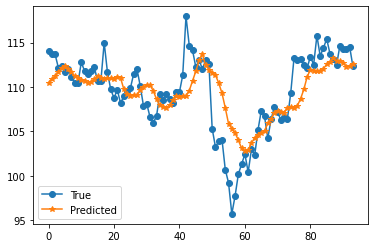

In [43]:
# multiple line plot
plt.plot(actuals, marker='o', label='True')
plt.plot(preds, marker='*', label='Predicted')

plt.legend()

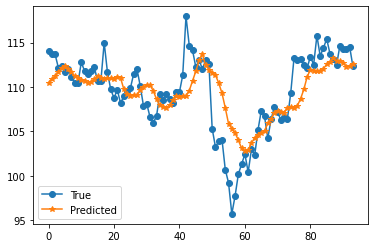

In [44]:
# multiple line plot
plt.plot(actuals, marker='o', label='True')
plt.plot(preds, marker='*', label='Predicted')

plt.legend()

# WELL DONE!